In [1]:
from keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [3]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [4]:
import tensorflow as tf
import os

In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
import numpy as np
import matplotlib.pyplot as plt #to view graph in colab itself
import IPython.display as display
from PIL import Image
import pathlib

In [8]:
x_train=train_datagen.flow_from_directory(r'C:\project\conversation engine for deaf and dumb\Dataset\training_set',target_size=(64,64),batch_size=200,
                                          class_mode='categorical',color_mode="grayscale")

Found 15750 images belonging to 9 classes.


In [9]:
x_test=test_datagen.flow_from_directory(r'C:\project\conversation engine for deaf and dumb\Dataset\test_set',target_size=(64,64),batch_size=200,
                                          class_mode='categorical',color_mode="grayscale")

Found 2250 images belonging to 9 classes.


In [10]:
model=Sequential()

In [11]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,1),activation='relu'))

In [12]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [13]:
model.add(Flatten())

In [14]:
model.add(Dense(units=512,activation='relu'))
model.add(Dense(units=261,activation='relu'))

In [15]:
model.add(Dense(units=9,activation='softmax'))

In [16]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [21]:
model.fit_generator(x_train,steps_per_epoch=len(x_train),epochs=10,validation_data=x_test,validation_steps=len(x_test))

C:\Users\91936\AppData\Local\Temp\ipykernel_7380\234118701.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train,steps_per_epoch=len(x_train),epochs=10,validation_data=x_test,validation_steps=len(x_test))


Epoch 1/10
79/79 [==============================] - 113s 1s/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.3487 - val_accuracy: 0.9738
Epoch 2/10
79/79 [==============================] - 112s 1s/step - loss: 0.0022 - accuracy: 0.9994 - val_loss: 0.3201 - val_accuracy: 0.9764
Epoch 3/10
79/79 [==============================] - 111s 1s/step - loss: 5.2562e-04 - accuracy: 1.0000 - val_loss: 0.3692 - val_accuracy: 0.9773
Epoch 4/10
79/79 [==============================] - 112s 1s/step - loss: 0.0013 - accuracy: 0.9996 - val_loss: 0.3651 - val_accuracy: 0.9769
Epoch 5/10
79/79 [==============================] - 113s 1s/step - loss: 0.0010 - accuracy: 0.9997 - val_loss: 0.3716 - val_accuracy: 0.9782
Epoch 6/10
79/79 [==============================] - 112s 1s/step - loss: 2.4746e-04 - accuracy: 1.0000 - val_loss: 0.3717 - val_accuracy: 0.9782
Epoch 7/10
79/79 [==============================] - 113s 1s/step - loss: 0.0022 - accuracy: 0.9994 - val_loss: 0.3136 - val_accuracy: 0.9791
Epoch

In [22]:
model.save('t21model.h5')

In [23]:
from tensorflow.keras.models import load_model
import numpy as np
import cv2
from tensorflow.keras.preprocessing import image

In [24]:
model=load_model('t21model.h5')

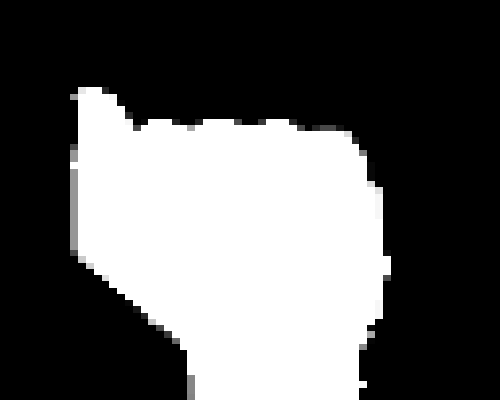

In [27]:
img=image.load_img(r'C:\project\conversation engine for deaf and dumb\Dataset\test_set\A\4.png',target_size=(400,500))
img

In [33]:
from skimage.transform import resize
def detect(frame):
    img=image.img_to_array(frame)
    img = resize(img,(64,64,1))
    img = np.expand_dims(img,axis=0)
    pred=np.argmax(model.predict(img))
    op=['A','B','C','D','E','F','G','H','I']
    print("THE PREDICTED LETTER IS ",op[pred])

In [34]:
img=image.load_img(r"C:\project\conversation engine for deaf and dumb\Dataset\test_set\A\4.png")
detect(img)

1/1 [==============================] - 0s 315ms/step
THE PREDICTED LETTER IS  A


In [35]:
img=image.load_img(r"C:\project\conversation engine for deaf and dumb\Dataset\test_set\G\9.png")
detect(img)

1/1 [==============================] - 0s 111ms/step
THE PREDICTED LETTER IS  G


In [37]:
img=image.load_img(r"C:\project\conversation engine for deaf and dumb\Dataset\test_set\I\26.png")
detect(img)

1/1 [==============================] - 0s 71ms/step
THE PREDICTED LETTER IS  I


In [38]:
img=image.load_img(r"C:\project\conversation engine for deaf and dumb\Dataset\test_set\C\55.png")
detect(img)

1/1 [==============================] - 0s 80ms/step
THE PREDICTED LETTER IS  C
